# Declaracion de variables e importacion de biblioteca

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as im
import csv


#wfsjkaskfassaf
nm=1e-9 #Nanometros
um=1e-6 #micrometros
mm=1e-3 #Milimetros

# Inicializacion del codigo

In [15]:
#Definicion para manejo de complejos
def ploteo_complejo(mat,indicador,escala):#funcion de ploteo completo 
    #indicador tipo de grafica
    
    #mat=mat. completa que voy a pltear
    #indicador=I para intensidad, A amplitud, P fase
    #escala=1 para nada , 0 para Logaritmica
    if(indicador=="I"): #intensidad
      mat=np.abs(mat)**2 #modulado cuadro
    
    elif(indicador=="A"): #amplitud
      mat=np.abs(mat)
    
    elif(indicador=="P"):
      mat=np.angle(mat)
    else:
      mat=mat

    if(escala==1):  #escala en caso de si no se ve
        plt.figure()
        plt.imshow(mat)
        plt.show()
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001)) #escala logaritmica
        plt.show()
        
    return 0


In [16]:
#observar tamaño de imagen
np.shape(cv2.imread("b.png",0)) #dimensiones de imagen 0 es escala de grises

(768, 768)

# Punto a
Detectar la presencia de objetos transparentes en distribuciones puras de fase

In [17]:
#Se debe importar una matrix 

In [73]:
file="a.txt"
data=np.loadtxt(file,delimiter="\t",skiprows=0,usecols=[0,2])
print(data)


IndexError: list index out of range

In [74]:
f= open("a.csv")
reader = csv.reader(f)
for row in reader:
    print (row)

FileNotFoundError: [Errno 2] No such file or directory: 'a.csv'

In [20]:
import numpy
filename = 'a.csv'
raw_data = open(filename)
data = numpy.loadtxt(raw_data, delimiter=",",skiprows=1)
print(data.shape)
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'a.csv'

# Punto B
Eliminar el ruido que afecta la informacion de intensidad suministrada

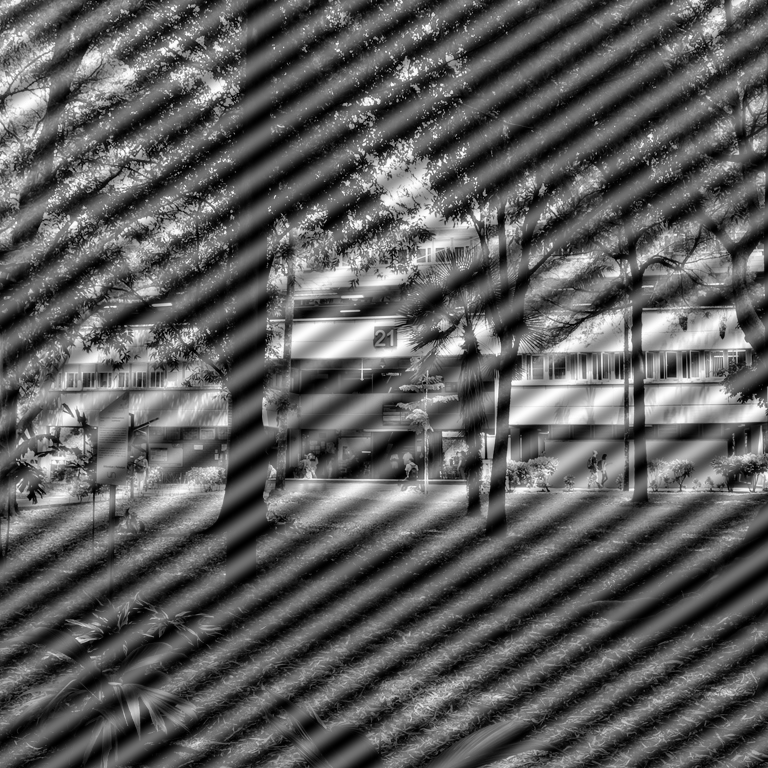

In [21]:
#Observacion de la imagen que se va a trabajar
from IPython.display import Image
Image("b.png")

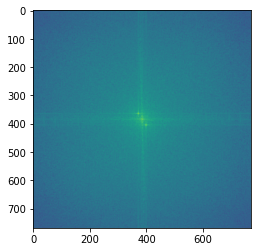

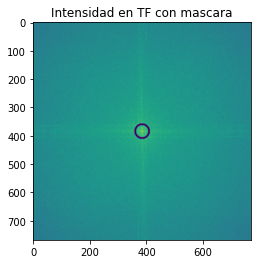

In [116]:
##Importe de imagen requerida y que se utilizara 

bloque21=cv2.imread("b.png",0) #1 es a color,9 grises

# La trasnformada de Fourier   

fft_img=np.fft.fftn(bloque21)
fft_img1=np.fft.fftshift(fft_img)

#Grafico de intensidad

ploteo_complejo(fft_img1,"I",0)

#Grafico de intensidad con mascara hallada abajo
plt.figure()
plt.title("Intensidad en TF con mascara")
plt.imshow(np.log(abs(fft_img1))*mask2)
plt.show() 


           




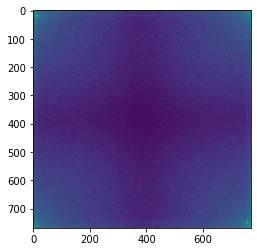

In [115]:
#trasnformada inversa de la original
fft_o1=np.fft.ifftn(bloque21)

ploteo_complejo(fft_o1,"I",0);

In [26]:
#Ahora ya tengo la imagen con su intensidad , tengo que filtrar en el dominio de fourier, por lo cual se crea una mascaca circula

In [27]:
#Saber el tamaño que se esta utilizando
np.shape(cv2.imread("b.png",1))

(768, 768, 3)

In [28]:
#Resultado final

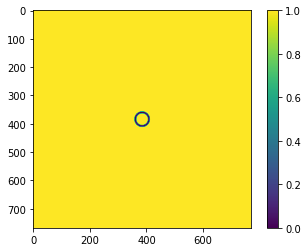

In [145]:
mask2=np.ones(np.shape(bloque21),dtype="uint8") #matriz de 1

coordx=int(np.shape(bloque21)[1]/2)
coordy=int(np.shape(bloque21)[0]/2) 

                         #tamaño del radio y cero
cv2.circle(mask2,((coordx),(coordy)),27,0,-1) #Circulo exterior 0
cv2.circle(mask2,((coordx),(coordy)),21,1,-1) #Circulo interior 1- > valor de 0-1

#Observacion de la mascara creada
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

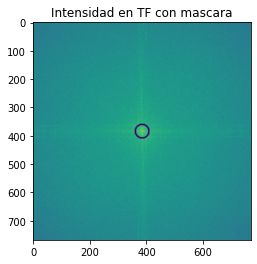

In [146]:
#Observacion de mascara para saber que radio es necesario para eliminar las frecuencias
plt.figure()
plt.title("Intensidad en TF con mascara")
plt.imshow(np.log(abs(fft_img1))*mask2)
plt.show() 

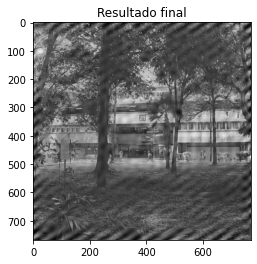

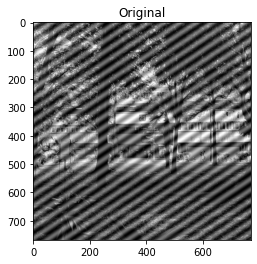

In [147]:
#Filtrado final de eliminacion de ruido

new_imagen=np.fft.ifftn(fft_img1*mask2)

#Final
plt.figure()
plt.title("Resultado final")
plt.imshow(np.abs(new_imagen),cmap="gray")
plt.show()

#Comparando con la original
ori=cv2.imread("b.png",1)

plt.figure()
plt.title("Original")
plt.imshow(np.abs(ori))
plt.show()


# Punto C

Detectar opticamente la presencia (ausencia) de un elemento en una imagen compuesta


In [ ]:
#Observ
from IPython.display import Image
Image("c.jpg")


In [ ]:
from IPython.display import Image
Image("c_clue.jpg")